## Energy Consumption Forecasting System  

##### About the Dataset  
To better follow the energy consumption, the government wants energy suppliers to install smart meters in every home in England, Wales and Scotland. There are more than 26 million homes for the energy suppliers to get to, with the goal of every home having a smart meter by 2020.

This roll out of meter is lead by the European Union who asked all member governments to look at smart meters as part of measures to upgrade our energy supply and tackle climate change. After an initial study, the British government decided to adopt smart meters as part of their plan to update our ageing energy system.

In this dataset, you will find a refactorised version of the data from the London data store, that contains the energy consumption readings for a sample of 5,567 London Households that took part in the UK Power Networks led Low Carbon London project between November 2011 and February 2014. The data from the smart meters seems associated only to the electrical consumption.

### Data Exploration

In [1]:
## importing required libraries
import pandas as pd ## for data manipulation and data handling

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(r"C:\Users\himan\Desktop\Projects\Energy_Forecasting_System\data\raw-data\CC_LCL-FullData.csv")

In [5]:
df.shape

(167932474, 4)

I am going to remove the first 166 Million rows. This is because it is making my system to lag so much. If you have high GPU and Memory, it will be worth working on the full dataset.

In [ ]:
## removing rows
total_rows = 167_932_474
rows_to_skip = total_rows - 1_000_000  

# Loading only the last 1 million rows for recent analysis
df = pd.read_csv(r"C:\Users\himan\Desktop\Projects\Energy_Forecasting_System\data\raw-data\CC_LCL-FullData.csv", skiprows=range(1, rows_to_skip + 1))

In [11]:
df.shape

(1000000, 4)

In [13]:
df.columns ## print the columns of the dataset

Index(['LCLid', 'stdorToU', 'DateTime', 'KWH/hh (per half hour) '], dtype='object')

In [14]:
df.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC005449,ToU,2012-05-19 00:00:00.0000000,0.614
1,MAC005449,ToU,2012-05-19 00:30:00.0000000,0.627
2,MAC005449,ToU,2012-05-19 01:00:00.0000000,0.587
3,MAC005449,ToU,2012-05-19 01:30:00.0000000,0.585
4,MAC005449,ToU,2012-05-19 02:00:00.0000000,0.561


In [15]:
df.drop('stdorToU',axis=1,inplace=True)

In [16]:
df.info() ## to get the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   LCLid                    1000000 non-null  object
 1   DateTime                 1000000 non-null  object
 2   KWH/hh (per half hour)   1000000 non-null  object
dtypes: object(3)
memory usage: 22.9+ MB


In [17]:
## checking for null values in the dataset
df.isnull().sum()

LCLid                      0
DateTime                   0
KWH/hh (per half hour)     0
dtype: int64

There are no Null Values in the dataset as we can see from above.

In [25]:
## checking for duplicate values in the dataset
df.duplicated().sum()

np.int64(680)

#### Handling duplicates

In [27]:
## removing all the duplicate rows
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [28]:
df.shape

(999320, 3)

In [29]:
print(df.index.is_monotonic_increasing)  # to check if the datetime column is sorted or not

True


The datetime is already sorted. So there's no need to sort it.

In [35]:
## Creating a new column "Day" from the "datetime" column
df['Day'] = pd.to_datetime(df['DateTime']).dt.date
# Droping the 'DateTime' column
df.drop('DateTime', axis=1, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999320 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   LCLid                    999320 non-null  object
 1   KWH/hh (per half hour)   999320 non-null  object
 2   Day                      999320 non-null  object
dtypes: object(3)
memory usage: 30.5+ MB


In [38]:
df.LCLid.unique() ## to get the unique values of the LCLid column

array(['MAC005449', 'MAC005465', 'MAC005470', 'MAC005473', 'MAC005474',
       'MAC005477', 'MAC005482', 'MAC005488', 'MAC005489', 'MAC005492',
       'MAC005495', 'MAC005498', 'MAC005507', 'MAC005508', 'MAC005510',
       'MAC005514', 'MAC005515', 'MAC005516', 'MAC005522', 'MAC005524',
       'MAC005529', 'MAC005533', 'MAC005535', 'MAC005536', 'MAC005537',
       'MAC005538', 'MAC005541', 'MAC005549', 'MAC005550', 'MAC005551',
       'MAC005557', 'MAC005564', 'MAC005565'], dtype=object)

In [39]:
grouped_df = df.groupby(['Day', 'LCLid'])['KWH/hh (per half hour) '].sum().reset_index()

In [40]:
len(grouped_df)

20901

In [41]:
grouped_df.head()

,Day,LCLid,KWH/hh (per half hour)
0,2012-04-16,MAC005465,0.444 0.127 0.188 0.19 0.188 0.193 0.15...
1,2012-04-16,MAC005470,0.077 0.163 0.023 0.046 0.383 0.43 0.08...
2,2012-04-16,MAC005473,0 0 0.03 0.038 0.023 0.014 0.027 0.027...
3,2012-04-16,MAC005474,0 0 0.025 0.032 0.049 0.043 0.068 0.09...
4,2012-04-16,MAC005477,0 0.127 0.078 0.077 0.233 0.099 0.072 ...


In [42]:
grouped_df.rename(columns={'KWH/hh (per half hour) ': 'Total_Daily_Consumption'}, inplace=True)

In [ ]:
housecount = grouped_df.groupby('Day')[['LCLid']].nunique()

<Axes: xlabel='Day'>

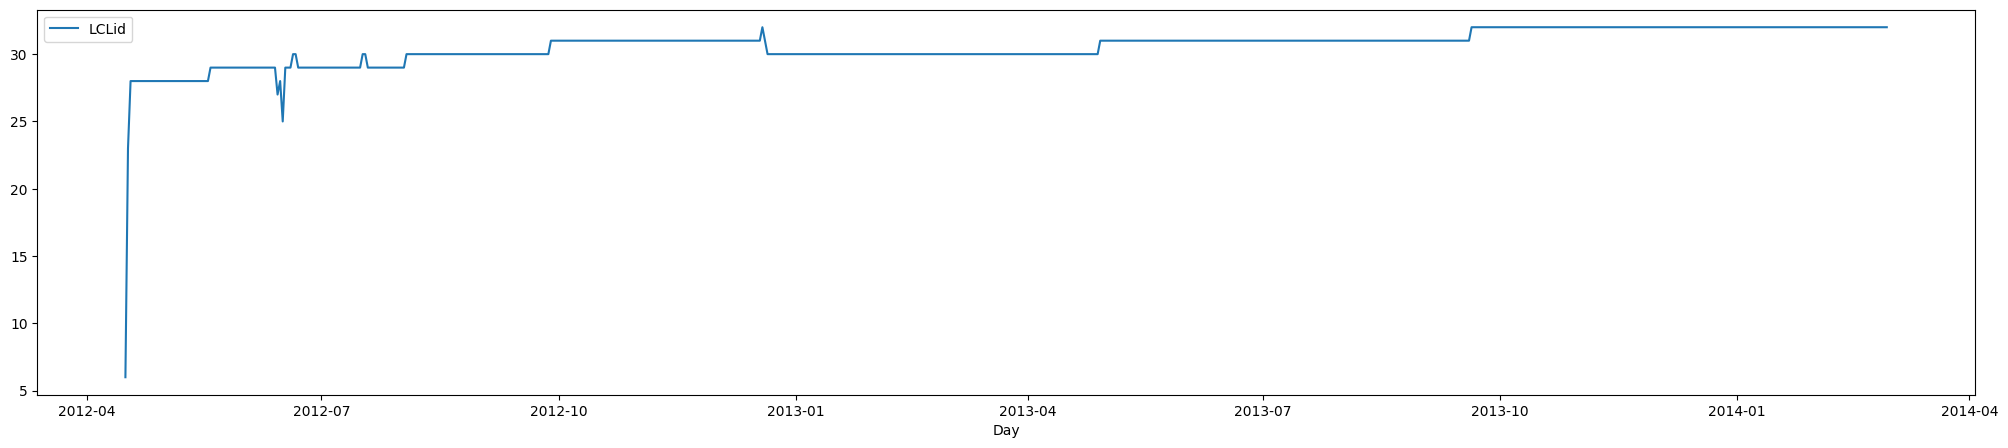

In [44]:
housecount.plot(figsize=(25,5))

### Data Cleaning

In our Dataset, we can clearly see that we have so much of missing values. They need to be handled carefully for Forecasting System. We cannot drop those rows as that would shrink our dataset and also harm our model's performance.

In [60]:
## making Datetime column as index
print(type(df.index)) ## check the type of index

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [61]:
#df['PJM_Load'] = df['PJM_Load'].interpolate(method='time', limit=10, limit_direction='both')

In [62]:
## interpolating all columns one by one
for col in df.columns:
    df[col] = df[col].interpolate(method='time', limit=10)


Role of Interpolate method -  
- It does not drop any data.
- It fills gaps by estimating values using the trend of your data over time.
- This helps keep your dataset complete and consistent for forecasting.

In [63]:
## checking for missing values again
print(f"Number of missing values after interpolation: {df.isnull().sum().sum()}")

Number of missing values after interpolation: 870967


The Interpolate method is unable to fill all the missing values. So now we are going to use forward fill and backward fill to fill the NA values.

In [64]:
## filling the missing values using forwar fill and backward fill
df = df.fillna(method='ffill').fillna(method='bfill')

## checking again for missing values
print(f"Number of missing values after ffill/bfill: {df.isnull().sum().sum()}")

Number of missing values after ffill/bfill: 0


It means we have successfully filled all the NA values.

In [65]:
df.describe() ## to get the statistical information about the dataset

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
count,162081.000000,162081.000000,162081.000000,162081.000000,162081.000000,162081.000000,162081.000000,162081.000000,162081.000000,162081.000000,162081.000000,162081.000000
mean,14713.875004,10365.035748,1932.903443,2736.801056,9884.813766,1580.580987,1249.411591,3022.712156,10447.151572,31906.194119,5459.313905,34596.504920
std,2618.957426,1718.321016,385.402629,450.824291,2654.348936,289.534772,240.967415,3886.417770,1737.967159,6142.308777,1001.170803,2633.047768
min,9581.000000,7237.000000,982.000000,907.000000,1253.000000,1014.000000,514.000000,0.000000,7003.000000,14544.000000,487.000000,17461.000000
25%,12379.000000,9631.000000,1621.000000,2533.000000,7190.000000,1364.000000,1166.000000,0.000000,9198.000000,28102.000000,4555.000000,35082.000000
50%,14219.000000,9631.000000,1849.000000,2533.000000,9576.000000,1499.000000,1166.000000,0.000000,10042.000000,30641.000000,5368.000000,35082.000000
75%,16438.000000,10639.000000,2173.000000,2768.000000,11514.000000,1741.000000,1166.000000,7229.000000,10344.000000,35016.000000,6136.000000,35082.000000
max,25695.000000,23753.000000,3746.000000,5445.000000,21651.000000,3054.000000,3490.000000,14032.000000,23631.000000,62009.000000,9594.000000,54030.000000


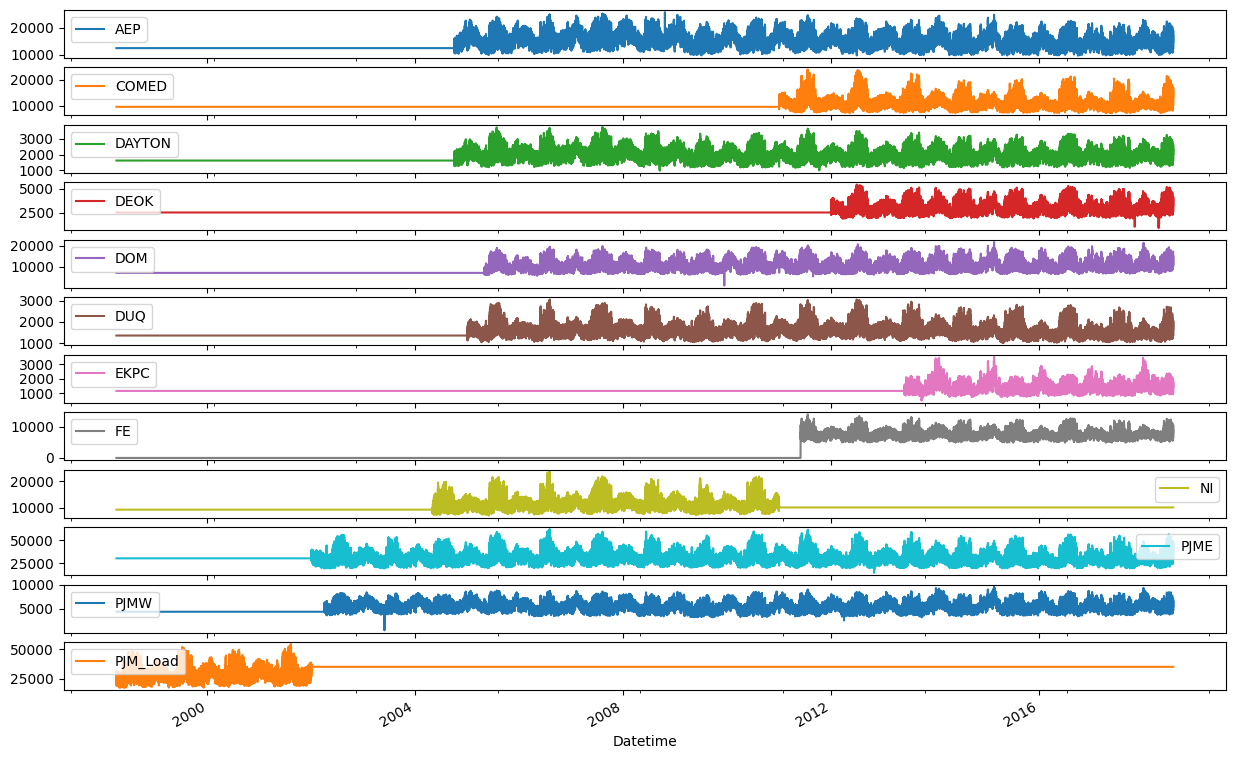

In [66]:
## visualizing distributions to spot outliers
import matplotlib.pyplot as plt
df.plot(subplots=True, figsize=(15,10))
plt.show()

From the .describe() method, we can see that our dataset contains outliers. We need to handle them so that they don't impact our model's prediction.

#### Handling Outliers

For handling outliers, i am going to perform IQR, and remove the outlier rows. Then i am going to check the shape of the dataset and i loose a quite good amount of data, i'll perform Capping method.

In [67]:
features_only = df.columns.difference(['PJM_Load'])

Q1 = df[features_only].quantile(0.25)
Q3 = df[features_only].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[features_only] = df[features_only].clip(lower=lower_bound, upper=upper_bound, axis=1)

In [68]:
## Cap (clip) outliers to the IQR bounds
##df_capped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

##df_capped.describe() ## to get the statistical information about the dataset after capping

In [69]:
df[features_only].describe()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW
count,162081.000000,162081.000000,162081.000000,162081.000000,162081.000000,162081.000000,162081.0,162081.000000,162081.000000,162081.000000,162081.000000
mean,14710.911421,10123.832152,1930.526428,2656.436692,9882.030682,1575.115522,1166.0,3022.712156,10176.826112,31766.909897,5458.810524
std,2609.420556,1023.447304,377.803734,241.753376,2645.223426,272.335316,0.0,3886.417770,1017.067674,5748.528998,999.442533
min,9581.000000,8119.000000,982.000000,2180.500000,1253.000000,1014.000000,1166.0,0.000000,7479.000000,17731.000000,2183.500000
25%,12379.000000,9631.000000,1621.000000,2533.000000,7190.000000,1364.000000,1166.0,0.000000,9198.000000,28102.000000,4555.000000
50%,14219.000000,9631.000000,1849.000000,2533.000000,9576.000000,1499.000000,1166.0,0.000000,10042.000000,30641.000000,5368.000000
75%,16438.000000,10639.000000,2173.000000,2768.000000,11514.000000,1741.000000,1166.0,7229.000000,10344.000000,35016.000000,6136.000000
max,22526.500000,12151.000000,3001.000000,3120.500000,18000.000000,2306.500000,1166.0,14032.000000,12063.000000,45387.000000,8507.500000


We can see that we have clipped the outliers into our upper bound.

In [70]:
## saving the cleaned dataset
df.to_parquet("C:/Users/himan/Desktop/Projects/Energy_Forecasting_System/data/processed-data/est_hourly_cleaned.parquet")